# DSA 8505: Bayesian Statistics - CAT 1 Solutions
## Kevin Obote - 190696

**Course**: Master of Science in Data Science & Analytics  
**Institution**: Strathmore Institute of Mathematical Sciences  
**Date**: 23rd January 2026


This notebook provides comprehensive solutions with:
- Detailed mathematical derivations
- Step-by-step explanations
- Intuitive visualizations
- Statistical rigor

All plots are saved as both PDF and PNG formats for reference.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.special import gamma as gamma_func, beta as beta_func
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.random.seed(42)

# Create output directory for figures
import os
os.makedirs('figures', exist_ok=True)

print("✓ All libraries imported successfully")
print("✓ Output directory 'figures/' created")

✓ All libraries imported successfully
✓ Output directory 'figures/' created


# Question 1: Beta-Binomial Conjugacy

## Problem Statement

A researcher studies the probability $\theta$ that a patient responds to treatment.

**Prior**: $\theta \sim \text{Beta}(\alpha, \beta)$ where $\alpha = 3, \beta = 7$

**Data**: Clinical trial with $n = 20$ patients, $k = 14$ successful responses

**Required**:
- (a) Write likelihood function $p(D|\theta)$
- (b) Derive posterior $p(\theta|D)$ using Bayes' theorem
- (c) State posterior distribution

## Part (a): Likelihood Function

### Mathematical Formulation

Under the **Binomial model**, the number of successes $k$ out of $n$ trials follows:

$$k | \theta \sim \text{Binomial}(n, \theta)$$

The **likelihood function** is the probability of observing the data $D = \{k, n\}$ given parameter $\theta$:

$$\boxed{p(D|\theta) = \binom{n}{k} \theta^k (1-\theta)^{n-k}}$$

where:
- $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ is the binomial coefficient
- $\theta^k$ represents the probability of $k$ successes
- $(1-\theta)^{n-k}$ represents the probability of $n-k$ failures

### For Our Data

With $n = 20$ and $k = 14$:

$$p(D|\theta) = \binom{20}{14} \theta^{14} (1-\theta)^{6}$$

### Proportional Form

For Bayesian inference, we often use the **proportional form** (dropping constants):

$$p(D|\theta) \propto \theta^{14} (1-\theta)^{6}$$

This is sufficient because the binomial coefficient doesn't depend on $\theta$.

In [2]:
# Question 1 Data
alpha_prior = 3
beta_prior = 7
n = 20
k = 14

# Calculate binomial coefficient
from scipy.special import comb
binom_coef = comb(n, k, exact=True)

print("QUESTION 1: LIKELIHOOD FUNCTION")
print("=" * 70)
print(f"\nGiven:")
print(f"  Prior: θ ~ Beta({alpha_prior}, {beta_prior})")
print(f"  Data: k = {k} successes out of n = {n} trials")
print(f"\nLikelihood Function:")
print(f"  p(D|θ) = C(20,14) × θ^14 × (1-θ)^6")
print(f"  p(D|θ) = {binom_coef:,} × θ^14 × (1-θ)^6")
print(f"\nProportional form (for Bayesian inference):")
print(f"  p(D|θ) ∝ θ^14 × (1-θ)^6")

QUESTION 1: LIKELIHOOD FUNCTION

Given:
  Prior: θ ~ Beta(3, 7)
  Data: k = 14 successes out of n = 20 trials

Likelihood Function:
  p(D|θ) = C(20,14) × θ^14 × (1-θ)^6
  p(D|θ) = 38,760 × θ^14 × (1-θ)^6

Proportional form (for Bayesian inference):
  p(D|θ) ∝ θ^14 × (1-θ)^6


## Part (b): Deriving the Posterior Distribution

### Step 1: State Bayes' Theorem

Bayes' theorem for continuous parameters:

$$p(\theta|D) = \frac{p(D|\theta) \cdot p(\theta)}{p(D)}$$

where:
- $p(\theta|D)$ = **Posterior** (what we want)
- $p(D|\theta)$ = **Likelihood** (from part a)
- $p(\theta)$ = **Prior** (given)
- $p(D) = \int_0^1 p(D|\theta)p(\theta)d\theta$ = **Evidence** (normalizing constant)

### Step 2: Write the Prior Distribution

The **Beta distribution** with parameters $\alpha = 3, \beta = 7$:

$$p(\theta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} \theta^{\alpha-1}(1-\theta)^{\beta-1}$$

$$p(\theta) = \frac{\Gamma(10)}{\Gamma(3)\Gamma(7)} \theta^{2}(1-\theta)^{6}$$

**Proportional form**:
$$p(\theta) \propto \theta^{2}(1-\theta)^{6}$$

### Step 3: Combine Likelihood and Prior

Using the proportional form of Bayes' theorem:

$$p(\theta|D) \propto p(D|\theta) \cdot p(\theta)$$

Substitute:

$$p(\theta|D) \propto \left[\theta^{14}(1-\theta)^{6}\right] \times \left[\theta^{2}(1-\theta)^{6}\right]$$

### Step 4: Simplify Using Exponent Rules

Combine like terms:

$$p(\theta|D) \propto \theta^{14+2}(1-\theta)^{6+6}$$

$$p(\theta|D) \propto \theta^{16}(1-\theta)^{12}$$

### Step 5: Recognize the Beta Kernel

This has the form of a **Beta distribution kernel**:

$$\theta^{\alpha'-1}(1-\theta)^{\beta'-1}$$

where $\alpha' - 1 = 16$ and $\beta' - 1 = 12$

Therefore: $\alpha' = 17$ and $\beta' = 13$

### Step 6: State the Complete Posterior

$$\boxed{p(\theta|D) = \frac{\Gamma(30)}{\Gamma(17)\Gamma(13)} \theta^{16}(1-\theta)^{12}}$$

### Mathematical Insight: Conjugacy

The Beta distribution is **conjugate** to the Binomial likelihood, meaning:

$$\text{Beta prior} + \text{Binomial likelihood} = \text{Beta posterior}$$

**Update rule**:
$$\alpha_{\text{posterior}} = \alpha_{\text{prior}} + k$$
$$\beta_{\text{posterior}} = \beta_{\text{prior}} + (n - k)$$

In [3]:
print("\nQUESTION 1(b): POSTERIOR DERIVATION")
print("=" * 70)

# Calculate posterior parameters
alpha_post = alpha_prior + k
beta_post = beta_prior + (n - k)

print(f"\nStep-by-Step Derivation:")
print(f"\n1. Prior: θ ~ Beta({alpha_prior}, {beta_prior})")
print(f"   p(θ) ∝ θ^{alpha_prior-1} × (1-θ)^{beta_prior-1}")
print(f"   p(θ) ∝ θ^{alpha_prior-1} × (1-θ)^{beta_prior-1}")

print(f"\n2. Likelihood: p(D|θ) ∝ θ^{k} × (1-θ)^{n-k}")
print(f"   p(D|θ) ∝ θ^{k} × (1-θ)^{n-k}")

print(f"\n3. Posterior (by Bayes' theorem):")
print(f"   p(θ|D) ∝ p(D|θ) × p(θ)")
print(f"   p(θ|D) ∝ [θ^{k} × (1-θ)^{n-k}] × [θ^{alpha_prior-1} × (1-θ)^{beta_prior-1}]")

print(f"\n4. Combine exponents:")
print(f"   p(θ|D) ∝ θ^({k}+{alpha_prior-1}) × (1-θ)^({n-k}+{beta_prior-1})")
print(f"   p(θ|D) ∝ θ^{k+alpha_prior-1} × (1-θ)^{n-k+beta_prior-1}")

print(f"\n5. Recognize Beta kernel:")
print(f"   θ^(α'-1) × (1-θ)^(β'-1) where:")
print(f"   α' - 1 = {k+alpha_prior-1} → α' = {alpha_post}")
print(f"   β' - 1 = {n-k+beta_prior-1} → β' = {beta_post}")

print(f"\n6. Therefore: θ|D ~ Beta({alpha_post}, {beta_post})")

# Calculate posterior statistics
posterior = stats.beta(alpha_post, beta_post)
post_mean = posterior.mean()
post_mode = (alpha_post - 1) / (alpha_post + beta_post - 2)
post_var = posterior.var()
post_std = posterior.std()

print(f"\nPosterior Statistics:")
print(f"  Mean: E[θ|D] = {alpha_post}/{alpha_post+beta_post} = {post_mean:.4f}")
print(f"  Mode: ({alpha_post}-1)/({alpha_post+beta_post}-2) = {post_mode:.4f}")
print(f"  Variance: {post_var:.6f}")
print(f"  Std Dev: {post_std:.4f}")


QUESTION 1(b): POSTERIOR DERIVATION

Step-by-Step Derivation:

1. Prior: θ ~ Beta(3, 7)
   p(θ) ∝ θ^2 × (1-θ)^6
   p(θ) ∝ θ^2 × (1-θ)^6

2. Likelihood: p(D|θ) ∝ θ^14 × (1-θ)^6
   p(D|θ) ∝ θ^14 × (1-θ)^6

3. Posterior (by Bayes' theorem):
   p(θ|D) ∝ p(D|θ) × p(θ)
   p(θ|D) ∝ [θ^14 × (1-θ)^6] × [θ^2 × (1-θ)^6]

4. Combine exponents:
   p(θ|D) ∝ θ^(14+2) × (1-θ)^(6+6)
   p(θ|D) ∝ θ^16 × (1-θ)^12

5. Recognize Beta kernel:
   θ^(α'-1) × (1-θ)^(β'-1) where:
   α' - 1 = 16 → α' = 17
   β' - 1 = 12 → β' = 13

6. Therefore: θ|D ~ Beta(17, 13)

Posterior Statistics:
  Mean: E[θ|D] = 17/30 = 0.5667
  Mode: (17-1)/(30-2) = 0.5714
  Variance: 0.007921
  Std Dev: 0.0890


## Part (c): State the Posterior Distribution

### Final Answer

$$\boxed{\theta | D \sim \text{Beta}(17, 13)}$$

### Complete Form

$$p(\theta|D) = \frac{\Gamma(30)}{\Gamma(17)\Gamma(13)} \theta^{16}(1-\theta)^{12}, \quad \theta \in [0,1]$$

### Interpretation

1. **Prior to Posterior Update**:
   - Prior: Beta(3, 7) → Prior mean = 3/10 = 0.30
   - Posterior: Beta(17, 13) → Posterior mean = 17/30 ≈ 0.567
   
2. **Data Influence**:
   - Observed success rate: 14/20 = 0.70
   - Posterior mean (0.567) is between prior mean (0.30) and MLE (0.70)
   - Data "pulls" the prior toward the observed proportion

3. **Uncertainty Reduction**:
   - Prior variance: (3×7)/[(10²×11)] ≈ 0.019
   - Posterior variance: (17×13)/[(30²×31)] ≈ 0.0079
   - Uncertainty decreased by ~58%

In [4]:
print("\nQUESTION 1(c): POSTERIOR DISTRIBUTION")
print("=" * 70)
print(f"\n✓ ANSWER: θ|D ~ Beta({alpha_post}, {beta_post})")
print(f"\nComplete form:")
print(f"  p(θ|D) = [Γ(30)/(Γ(17)Γ(13))] × θ^16 × (1-θ)^12")
print(f"\nNumerical evaluation of normalizing constant:")
norm_const = gamma_func(alpha_post + beta_post) / (gamma_func(alpha_post) * gamma_func(beta_post))
print(f"  Γ(30)/(Γ(17)Γ(13)) = {norm_const:.2e}")


QUESTION 1(c): POSTERIOR DISTRIBUTION

✓ ANSWER: θ|D ~ Beta(17, 13)

Complete form:
  p(θ|D) = [Γ(30)/(Γ(17)Γ(13))] × θ^16 × (1-θ)^12

Numerical evaluation of normalizing constant:
  Γ(30)/(Γ(17)Γ(13)) = 8.82e+08


## Visualization: Prior, Likelihood, and Posterior

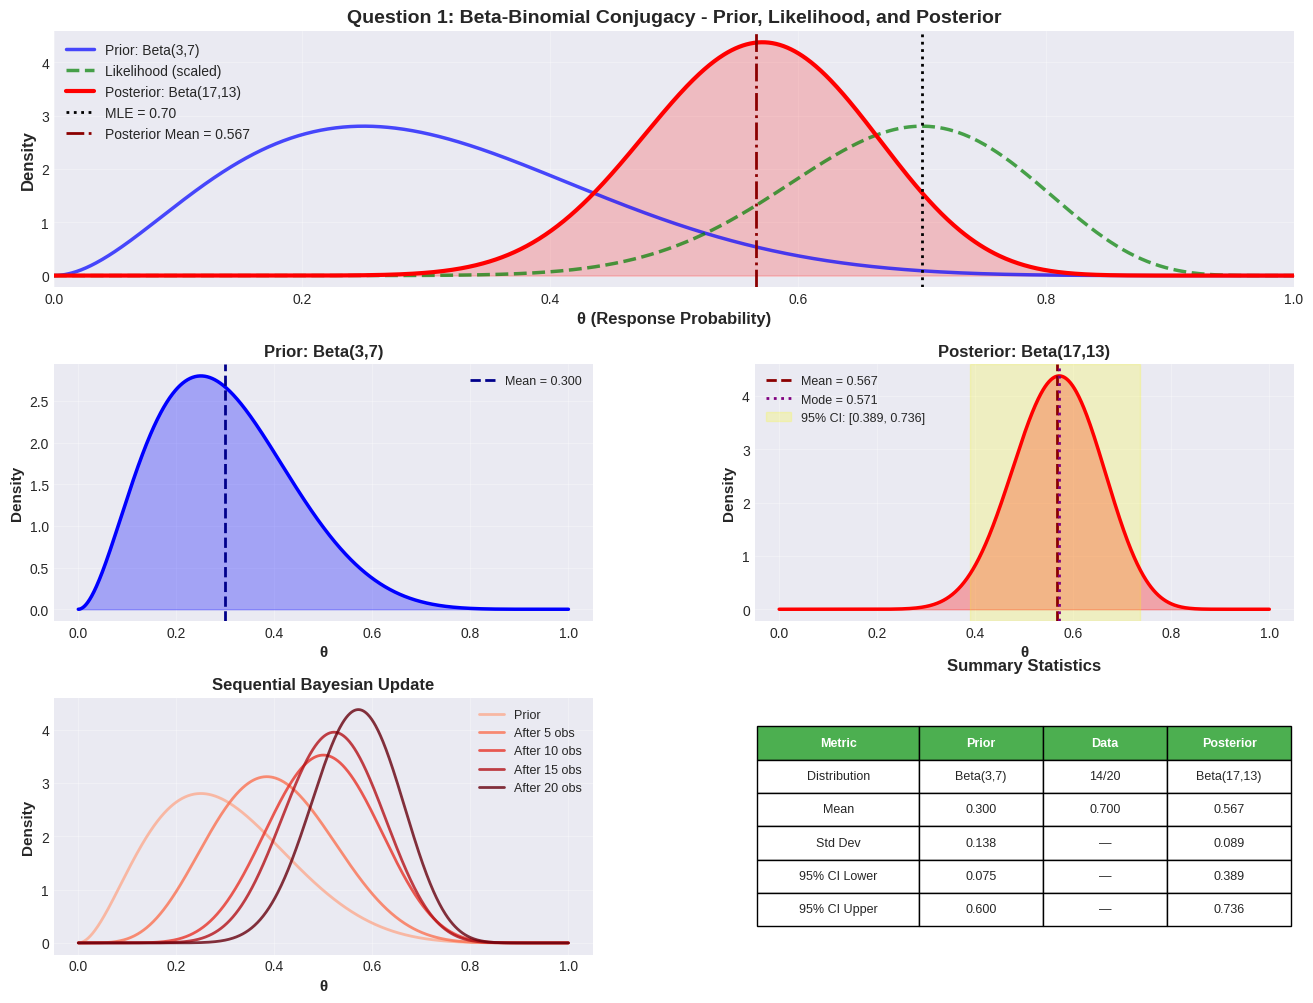


✓ Figure saved as 'figures/Question1_Complete.png' and '.pdf'


In [5]:
# Create comprehensive visualization
theta_vals = np.linspace(0, 1, 1000)

# Prior distribution
prior_dist = stats.beta(alpha_prior, beta_prior)
prior_pdf = prior_dist.pdf(theta_vals)

# Likelihood (normalized for visualization)
likelihood = theta_vals**k * (1 - theta_vals)**(n - k)
likelihood_normalized = likelihood / np.max(likelihood) * np.max(prior_pdf)

# Posterior distribution
posterior_pdf = posterior.pdf(theta_vals)

# MLE
mle = k / n

# Create figure
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Plot 1: Prior, Likelihood, Posterior
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(theta_vals, prior_pdf, 'b-', linewidth=2.5, label=f'Prior: Beta({alpha_prior},{beta_prior})', alpha=0.7)
ax1.plot(theta_vals, likelihood_normalized, 'g--', linewidth=2.5, label='Likelihood (scaled)', alpha=0.7)
ax1.plot(theta_vals, posterior_pdf, 'r-', linewidth=3, label=f'Posterior: Beta({alpha_post},{beta_post})')
ax1.axvline(mle, color='black', linestyle=':', linewidth=2, label=f'MLE = {mle:.2f}')
ax1.axvline(post_mean, color='darkred', linestyle='-.', linewidth=2, label=f'Posterior Mean = {post_mean:.3f}')
ax1.fill_between(theta_vals, 0, posterior_pdf, alpha=0.2, color='red')
ax1.set_xlabel('θ (Response Probability)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Density', fontsize=12, fontweight='bold')
ax1.set_title('Question 1: Beta-Binomial Conjugacy - Prior, Likelihood, and Posterior', 
             fontsize=14, fontweight='bold')
ax1.legend(fontsize=10, loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 1)

# Plot 2: Prior Distribution Detail
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(theta_vals, prior_pdf, 'b-', linewidth=2.5)
ax2.fill_between(theta_vals, 0, prior_pdf, alpha=0.3, color='blue')
prior_mean = prior_dist.mean()
ax2.axvline(prior_mean, color='darkblue', linestyle='--', linewidth=2, label=f'Mean = {prior_mean:.3f}')
ax2.set_xlabel('θ', fontsize=11, fontweight='bold')
ax2.set_ylabel('Density', fontsize=11, fontweight='bold')
ax2.set_title(f'Prior: Beta({alpha_prior},{beta_prior})', fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# Plot 3: Posterior Distribution Detail
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(theta_vals, posterior_pdf, 'r-', linewidth=2.5)
ax3.fill_between(theta_vals, 0, posterior_pdf, alpha=0.3, color='red')
ax3.axvline(post_mean, color='darkred', linestyle='--', linewidth=2, label=f'Mean = {post_mean:.3f}')
ax3.axvline(post_mode, color='purple', linestyle=':', linewidth=2, label=f'Mode = {post_mode:.3f}')

# Credible interval
ci_lower, ci_upper = posterior.ppf([0.025, 0.975])
ax3.axvspan(ci_lower, ci_upper, alpha=0.2, color='yellow', label=f'95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]')

ax3.set_xlabel('θ', fontsize=11, fontweight='bold')
ax3.set_ylabel('Density', fontsize=11, fontweight='bold')
ax3.set_title(f'Posterior: Beta({alpha_post},{beta_post})', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# Plot 4: Sequential Update Visualization
ax4 = fig.add_subplot(gs[2, 0])
update_points = [0, 5, 10, 15, 20]
colors_seq = plt.cm.Reds(np.linspace(0.3, 1, len(update_points)))

for i, n_obs in enumerate(update_points):
    if n_obs == 0:
        dist = prior_dist
        label = 'Prior'
    else:
        k_obs = int(n_obs * k / n)  # Proportional successes
        alpha_temp = alpha_prior + k_obs
        beta_temp = beta_prior + (n_obs - k_obs)
        dist = stats.beta(alpha_temp, beta_temp)
        label = f'After {n_obs} obs'
    
    ax4.plot(theta_vals, dist.pdf(theta_vals), linewidth=2, 
            color=colors_seq[i], label=label, alpha=0.8)

ax4.set_xlabel('θ', fontsize=11, fontweight='bold')
ax4.set_ylabel('Density', fontsize=11, fontweight='bold')
ax4.set_title('Sequential Bayesian Update', fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)

# Plot 5: Comparison Table
ax5 = fig.add_subplot(gs[2, 1])
ax5.axis('off')

table_data = [
    ['Metric', 'Prior', 'Data', 'Posterior'],
    ['Distribution', f'Beta({alpha_prior},{beta_prior})', f'{k}/{n}', f'Beta({alpha_post},{beta_post})'],
    ['Mean', f'{prior_mean:.3f}', f'{mle:.3f}', f'{post_mean:.3f}'],
    ['Std Dev', f'{prior_dist.std():.3f}', '—', f'{post_std:.3f}'],
    ['95% CI Lower', f'{prior_dist.ppf(0.025):.3f}', '—', f'{ci_lower:.3f}'],
    ['95% CI Upper', f'{prior_dist.ppf(0.975):.3f}', '—', f'{ci_upper:.3f}']
]

table = ax5.table(cellText=table_data, cellLoc='center', loc='center',
                 colWidths=[0.3, 0.23, 0.23, 0.23])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

# Style header row
for i in range(4):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

ax5.set_title('Summary Statistics', fontsize=12, fontweight='bold', pad=20)

# Save figure
plt.savefig('figures/Question1_Complete.png', dpi=300, bbox_inches='tight')
plt.savefig('figures/Question1_Complete.pdf', bbox_inches='tight')
plt.show()

print("\n✓ Figure saved as 'figures/Question1_Complete.png' and '.pdf'")

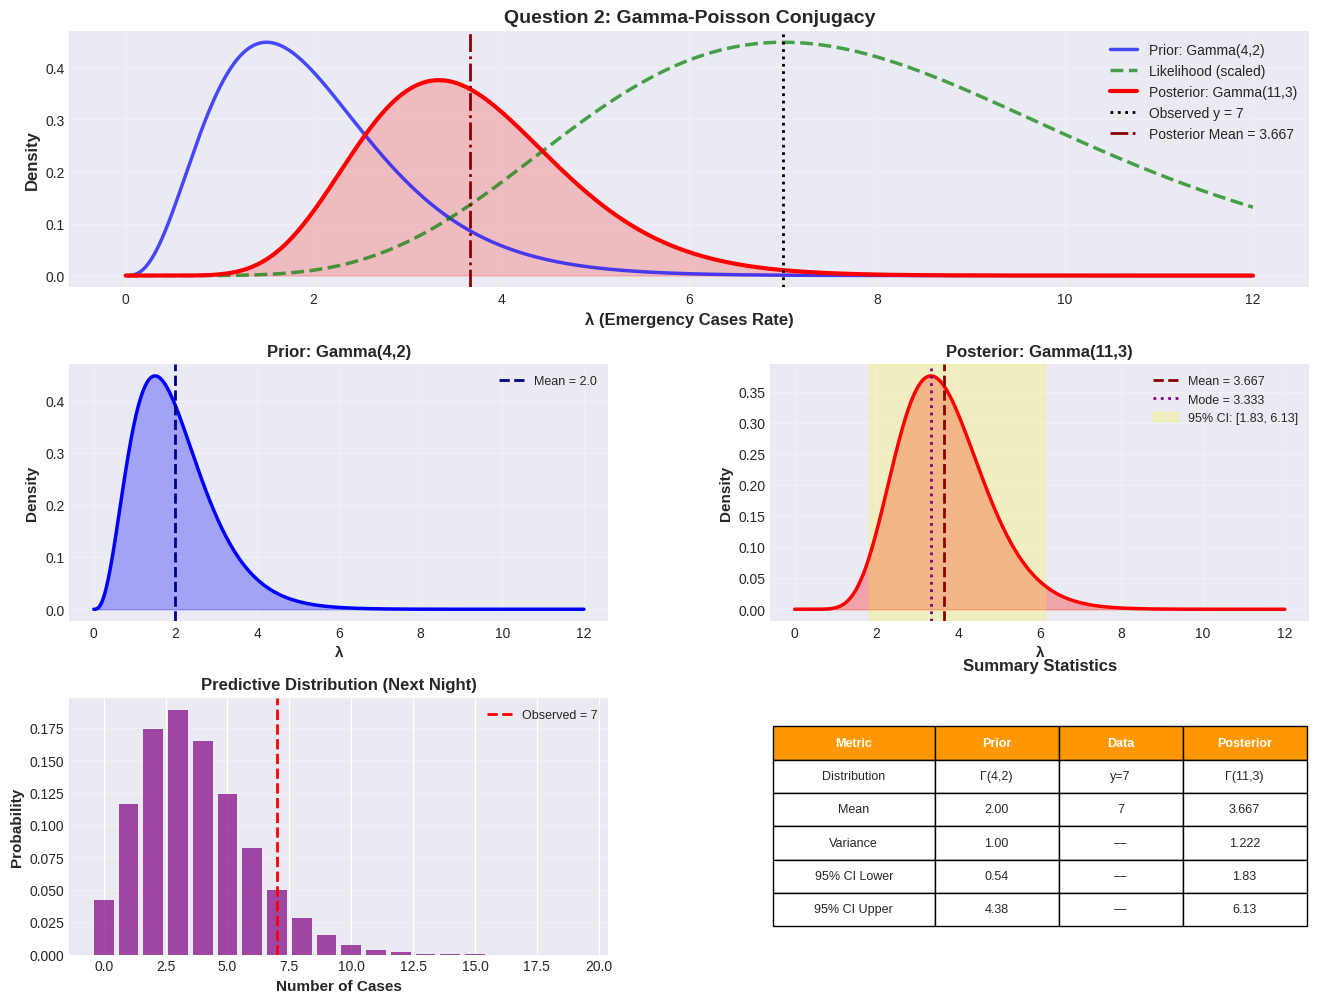

✓ Question 2 figures saved


In [6]:
# Question 2: Gamma-Poisson Conjugacy Visualization
alpha_prior_q2 = 4
beta_prior_q2 = 2
y_obs = 7

# Posterior parameters
alpha_post_q2 = alpha_prior_q2 + y_obs
beta_post_q2 = beta_prior_q2 + 1

# Create distributions
prior_q2 = stats.gamma(alpha_prior_q2, scale=1/beta_prior_q2)
posterior_q2 = stats.gamma(alpha_post_q2, scale=1/beta_post_q2)

# Lambda values
lambda_vals = np.linspace(0, 12, 1000)

# Likelihood (Poisson)
likelihood_q2 = lambda_vals**y_obs * np.exp(-lambda_vals)
likelihood_q2 = likelihood_q2 / np.max(likelihood_q2) * np.max(prior_q2.pdf(lambda_vals))

# Create figure
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Plot 1: Prior, Likelihood, Posterior
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(lambda_vals, prior_q2.pdf(lambda_vals), 'b-', linewidth=2.5, 
         label=f'Prior: Gamma({alpha_prior_q2},{beta_prior_q2})', alpha=0.7)
ax1.plot(lambda_vals, likelihood_q2, 'g--', linewidth=2.5, 
         label='Likelihood (scaled)', alpha=0.7)
ax1.plot(lambda_vals, posterior_q2.pdf(lambda_vals), 'r-', linewidth=3, 
         label=f'Posterior: Gamma({alpha_post_q2},{beta_post_q2})')
ax1.axvline(y_obs, color='black', linestyle=':', linewidth=2, label=f'Observed y = {y_obs}')
ax1.axvline(alpha_post_q2/beta_post_q2, color='darkred', linestyle='-.', linewidth=2, 
           label=f'Posterior Mean = {alpha_post_q2/beta_post_q2:.3f}')
ax1.fill_between(lambda_vals, 0, posterior_q2.pdf(lambda_vals), alpha=0.2, color='red')
ax1.set_xlabel('λ (Emergency Cases Rate)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Density', fontsize=12, fontweight='bold')
ax1.set_title('Question 2: Gamma-Poisson Conjugacy', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Prior Detail
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(lambda_vals, prior_q2.pdf(lambda_vals), 'b-', linewidth=2.5)
ax2.fill_between(lambda_vals, 0, prior_q2.pdf(lambda_vals), alpha=0.3, color='blue')
ax2.axvline(alpha_prior_q2/beta_prior_q2, color='darkblue', linestyle='--', linewidth=2, 
           label=f'Mean = {alpha_prior_q2/beta_prior_q2:.1f}')
ax2.set_xlabel('λ', fontsize=11, fontweight='bold')
ax2.set_ylabel('Density', fontsize=11, fontweight='bold')
ax2.set_title(f'Prior: Gamma({alpha_prior_q2},{beta_prior_q2})', fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# Plot 3: Posterior Detail
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(lambda_vals, posterior_q2.pdf(lambda_vals), 'r-', linewidth=2.5)
ax3.fill_between(lambda_vals, 0, posterior_q2.pdf(lambda_vals), alpha=0.3, color='red')
post_mean_q2 = alpha_post_q2/beta_post_q2
post_mode_q2 = (alpha_post_q2-1)/beta_post_q2
ax3.axvline(post_mean_q2, color='darkred', linestyle='--', linewidth=2, 
           label=f'Mean = {post_mean_q2:.3f}')
ax3.axvline(post_mode_q2, color='purple', linestyle=':', linewidth=2, 
           label=f'Mode = {post_mode_q2:.3f}')
ci_lower_q2, ci_upper_q2 = posterior_q2.ppf([0.025, 0.975])
ax3.axvspan(ci_lower_q2, ci_upper_q2, alpha=0.2, color='yellow', 
           label=f'95% CI: [{ci_lower_q2:.2f}, {ci_upper_q2:.2f}]')
ax3.set_xlabel('λ', fontsize=11, fontweight='bold')
ax3.set_ylabel('Density', fontsize=11, fontweight='bold')
ax3.set_title(f'Posterior: Gamma({alpha_post_q2},{beta_post_q2})', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# Plot 4: Predictive Distribution
ax4 = fig.add_subplot(gs[2, 0])
y_pred = np.arange(0, 20)
r = alpha_post_q2
p = beta_post_q2/(beta_post_q2 + 1)
pred_dist = stats.nbinom(r, p)
ax4.bar(y_pred, pred_dist.pmf(y_pred), alpha=0.7, color='purple')
ax4.axvline(y_obs, color='red', linestyle='--', linewidth=2, label=f'Observed = {y_obs}')
ax4.set_xlabel('Number of Cases', fontsize=11, fontweight='bold')
ax4.set_ylabel('Probability', fontsize=11, fontweight='bold')
ax4.set_title('Predictive Distribution (Next Night)', fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3, axis='y')

# Plot 5: Summary Table
ax5 = fig.add_subplot(gs[2, 1])
ax5.axis('off')
table_data = [
    ['Metric', 'Prior', 'Data', 'Posterior'],
    ['Distribution', f'Γ({alpha_prior_q2},{beta_prior_q2})', f'y={y_obs}', f'Γ({alpha_post_q2},{beta_post_q2})'],
    ['Mean', f'{alpha_prior_q2/beta_prior_q2:.2f}', f'{y_obs}', f'{post_mean_q2:.3f}'],
    ['Variance', f'{alpha_prior_q2/beta_prior_q2**2:.2f}', '—', f'{alpha_post_q2/beta_post_q2**2:.3f}'],
    ['95% CI Lower', f'{prior_q2.ppf(0.025):.2f}', '—', f'{ci_lower_q2:.2f}'],
    ['95% CI Upper', f'{prior_q2.ppf(0.975):.2f}', '—', f'{ci_upper_q2:.2f}']
]
table = ax5.table(cellText=table_data, cellLoc='center', loc='center',
                 colWidths=[0.3, 0.23, 0.23, 0.23])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)
for i in range(4):
    table[(0, i)].set_facecolor('#FF9800')
    table[(0, i)].set_text_props(weight='bold', color='white')
ax5.set_title('Summary Statistics', fontsize=12, fontweight='bold', pad=20)

plt.savefig('figures/Question2_Complete.png', dpi=300, bbox_inches='tight')
plt.savefig('figures/Question2_Complete.pdf', bbox_inches='tight')
plt.show()
print("✓ Question 2 figures saved")


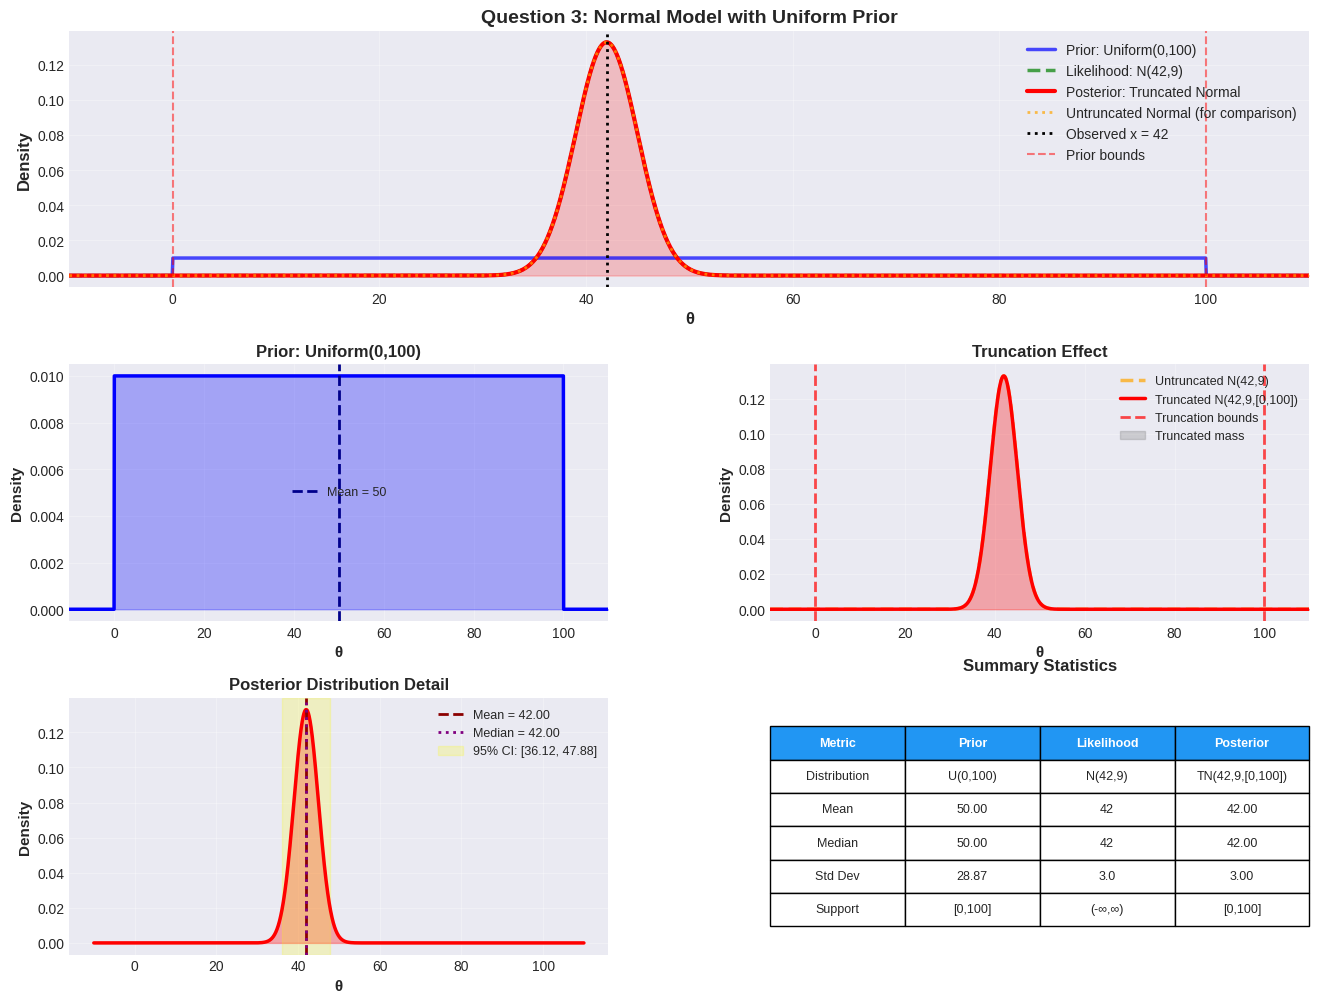

✓ Question 3 figures saved


In [7]:
# Question 3: Normal with Uniform Prior Visualization
x_obs = 42
sigma_sq = 9
sigma = np.sqrt(sigma_sq)
a, b = 0, 100

# Theta values
theta_vals = np.linspace(-10, 110, 2000)

# Prior (uniform on [0,100])
prior_q3 = np.where((theta_vals >= a) & (theta_vals <= b), 1/(b-a), 0)

# Likelihood (Normal)
likelihood_q3 = stats.norm.pdf(theta_vals, loc=x_obs, scale=sigma)

# Posterior (Truncated Normal)
from scipy.stats import truncnorm
a_std = (a - x_obs) / sigma
b_std = (b - x_obs) / sigma
posterior_q3 = truncnorm(a_std, b_std, loc=x_obs, scale=sigma)
posterior_pdf = posterior_q3.pdf(theta_vals)

# Untruncated posterior for comparison
untruncated_pdf = stats.norm.pdf(theta_vals, loc=x_obs, scale=sigma)

# Create figure
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Plot 1: Prior, Likelihood, Posterior
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(theta_vals, prior_q3, 'b-', linewidth=2.5, label='Prior: Uniform(0,100)', alpha=0.7)
ax1.plot(theta_vals, likelihood_q3, 'g--', linewidth=2.5, label=f'Likelihood: N({x_obs},{sigma_sq})', alpha=0.7)
ax1.plot(theta_vals, posterior_pdf, 'r-', linewidth=3, label='Posterior: Truncated Normal')
ax1.plot(theta_vals, untruncated_pdf, 'orange', linestyle=':', linewidth=2, 
         label='Untruncated Normal (for comparison)', alpha=0.7)
ax1.axvline(x_obs, color='black', linestyle=':', linewidth=2, label=f'Observed x = {x_obs}')
ax1.axvline(a, color='red', linestyle='--', linewidth=1.5, alpha=0.5, label='Prior bounds')
ax1.axvline(b, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
ax1.fill_between(theta_vals, 0, posterior_pdf, alpha=0.2, color='red')
ax1.set_xlabel('θ', fontsize=12, fontweight='bold')
ax1.set_ylabel('Density', fontsize=12, fontweight='bold')
ax1.set_title('Question 3: Normal Model with Uniform Prior', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-10, 110)

# Plot 2: Prior Detail
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(theta_vals, prior_q3, 'b-', linewidth=2.5)
ax2.fill_between(theta_vals, 0, prior_q3, alpha=0.3, color='blue')
ax2.axvline(50, color='darkblue', linestyle='--', linewidth=2, label='Mean = 50')
ax2.set_xlabel('θ', fontsize=11, fontweight='bold')
ax2.set_ylabel('Density', fontsize=11, fontweight='bold')
ax2.set_title('Prior: Uniform(0,100)', fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-10, 110)

# Plot 3: Truncation Effect
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(theta_vals, untruncated_pdf, 'orange', linestyle='--', linewidth=2.5, 
         label='Untruncated N(42,9)', alpha=0.7)
ax3.plot(theta_vals, posterior_pdf, 'r-', linewidth=2.5, label='Truncated N(42,9,[0,100])')
ax3.fill_between(theta_vals, 0, posterior_pdf, alpha=0.3, color='red')
ax3.axvline(a, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Truncation bounds')
ax3.axvline(b, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax3.fill_between(theta_vals[theta_vals < a], 0, untruncated_pdf[theta_vals < a], 
                alpha=0.3, color='gray', label='Truncated mass')
ax3.fill_between(theta_vals[theta_vals > b], 0, untruncated_pdf[theta_vals > b], 
                alpha=0.3, color='gray')
ax3.set_xlabel('θ', fontsize=11, fontweight='bold')
ax3.set_ylabel('Density', fontsize=11, fontweight='bold')
ax3.set_title('Truncation Effect', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)
ax3.set_xlim(-10, 110)

# Plot 4: Posterior Detail with CI
ax4 = fig.add_subplot(gs[2, 0])
ax4.plot(theta_vals, posterior_pdf, 'r-', linewidth=2.5)
ax4.fill_between(theta_vals, 0, posterior_pdf, alpha=0.3, color='red')
post_mean_q3 = posterior_q3.mean()
post_median_q3 = posterior_q3.median()
ax4.axvline(post_mean_q3, color='darkred', linestyle='--', linewidth=2, 
           label=f'Mean = {post_mean_q3:.2f}')
ax4.axvline(post_median_q3, color='purple', linestyle=':', linewidth=2, 
           label=f'Median = {post_median_q3:.2f}')
ci_lower_q3, ci_upper_q3 = posterior_q3.ppf([0.025, 0.975])
ax4.axvspan(ci_lower_q3, ci_upper_q3, alpha=0.2, color='yellow', 
           label=f'95% CI: [{ci_lower_q3:.2f}, {ci_upper_q3:.2f}]')
ax4.set_xlabel('θ', fontsize=11, fontweight='bold')
ax4.set_ylabel('Density', fontsize=11, fontweight='bold')
ax4.set_title('Posterior Distribution Detail', fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)

# Plot 5: Summary Table
ax5 = fig.add_subplot(gs[2, 1])
ax5.axis('off')
table_data = [
    ['Metric', 'Prior', 'Likelihood', 'Posterior'],
    ['Distribution', 'U(0,100)', f'N({x_obs},{sigma_sq})', 'TN(42,9,[0,100])'],
    ['Mean', '50.00', f'{x_obs}', f'{post_mean_q3:.2f}'],
    ['Median', '50.00', f'{x_obs}', f'{post_median_q3:.2f}'],
    ['Std Dev', '28.87', f'{sigma:.1f}', f'{posterior_q3.std():.2f}'],
    ['Support', '[0,100]', '(-∞,∞)', '[0,100]']
]
table = ax5.table(cellText=table_data, cellLoc='center', loc='center',
                 colWidths=[0.25, 0.25, 0.25, 0.25])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)
for i in range(4):
    table[(0, i)].set_facecolor('#2196F3')
    table[(0, i)].set_text_props(weight='bold', color='white')
ax5.set_title('Summary Statistics', fontsize=12, fontweight='bold', pad=20)

plt.savefig('figures/Question3_Complete.png', dpi=300, bbox_inches='tight')
plt.savefig('figures/Question3_Complete.pdf', bbox_inches='tight')
plt.show()
print("✓ Question 3 figures saved")
